# Multiple Linear Regression

### Importing the libraries

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns",None)
pd.set_option("display.precision",2)
np.set_printoptions(precision=2)

### Importing the data

In [142]:
data1 = pd.read_csv("ex1data2.csv")
data1.head()

,"Size,Bedrooms,Price"
0,"2104,3,399900"
1,"1600,3,329900"
2,"2400,3,369000"
3,"1416,2,232000"
4,"3000,4,539900"


In [143]:
data1_array = data1.iloc[:,:].values
print(data1_array)

[['2104,3,399900']
 ['1600,3,329900']
 ['2400,3,369000']
 ['1416,2,232000']
 ['3000,4,539900']
 ['1985,4,299900']
 ['1534,3,314900']
 ['1427,3,198999']
 ['1380,3,212000']
 ['1494,3,242500']
 ['1940,4,239999']
 ['2000,3,347000']
 ['1890,3,329999']
 ['4478,5,699900']
 ['1268,3,259900']
 ['2300,4,449900']
 ['1320,2,299900']
 ['1236,3,199900']
 ['2609,4,499998']
 ['3031,4,599000']
 ['1767,3,252900']
 ['1888,2,255000']
 ['1604,3,242900']
 ['1962,4,259900']
 ['3890,3,573900']
 ['1100,3,249900']
 ['1458,3,464500']
 ['2526,3,469000']
 ['2200,3,475000']
 ['2637,3,299900']
 ['1839,2,349900']
 ['1000,1,169900']
 ['2040,4,314900']
 ['3137,3,579900']
 ['1811,4,285900']
 ['1437,3,249900']
 ['1239,3,229900']
 ['2132,4,345000']
 ['4215,4,549000']
 ['2162,4,287000']
 ['1664,2,368500']
 ['2238,3,329900']
 ['2567,4,314000']
 ['1200,3,299000']
 ['852,2,179900']
 ['1852,4,299900']
 ['1203,3,239500']]


In [144]:
x=[]
y=[]
for lst in data1_array:
    sup_lst = lst[0].split(",")
    sup_lst1 = []
    sup_lst1.append(float(sup_lst[0]))
    sup_lst1.append(float(sup_lst[1]))
    x.append(sup_lst1)
    y.append(float(sup_lst[-1]))
x,y

([[2104.0, 3.0],
  [1600.0, 3.0],
  [2400.0, 3.0],
  [1416.0, 2.0],
  [3000.0, 4.0],
  [1985.0, 4.0],
  [1534.0, 3.0],
  [1427.0, 3.0],
  [1380.0, 3.0],
  [1494.0, 3.0],
  [1940.0, 4.0],
  [2000.0, 3.0],
  [1890.0, 3.0],
  [4478.0, 5.0],
  [1268.0, 3.0],
  [2300.0, 4.0],
  [1320.0, 2.0],
  [1236.0, 3.0],
  [2609.0, 4.0],
  [3031.0, 4.0],
  [1767.0, 3.0],
  [1888.0, 2.0],
  [1604.0, 3.0],
  [1962.0, 4.0],
  [3890.0, 3.0],
  [1100.0, 3.0],
  [1458.0, 3.0],
  [2526.0, 3.0],
  [2200.0, 3.0],
  [2637.0, 3.0],
  [1839.0, 2.0],
  [1000.0, 1.0],
  [2040.0, 4.0],
  [3137.0, 3.0],
  [1811.0, 4.0],
  [1437.0, 3.0],
  [1239.0, 3.0],
  [2132.0, 4.0],
  [4215.0, 4.0],
  [2162.0, 4.0],
  [1664.0, 2.0],
  [2238.0, 3.0],
  [2567.0, 4.0],
  [1200.0, 3.0],
  [852.0, 2.0],
  [1852.0, 4.0],
  [1203.0, 3.0]],
 [399900.0,
  329900.0,
  369000.0,
  232000.0,
  539900.0,
  299900.0,
  314900.0,
  198999.0,
  212000.0,
  242500.0,
  239999.0,
  347000.0,
  329999.0,
  699900.0,
  259900.0,
  449900.0,
  299900.

In [145]:
x=np.array(x)
y=np.array(y)
x,y

(array([[2.10e+03, 3.00e+00],
        [1.60e+03, 3.00e+00],
        [2.40e+03, 3.00e+00],
        [1.42e+03, 2.00e+00],
        [3.00e+03, 4.00e+00],
        [1.98e+03, 4.00e+00],
        [1.53e+03, 3.00e+00],
        [1.43e+03, 3.00e+00],
        [1.38e+03, 3.00e+00],
        [1.49e+03, 3.00e+00],
        [1.94e+03, 4.00e+00],
        [2.00e+03, 3.00e+00],
        [1.89e+03, 3.00e+00],
        [4.48e+03, 5.00e+00],
        [1.27e+03, 3.00e+00],
        [2.30e+03, 4.00e+00],
        [1.32e+03, 2.00e+00],
        [1.24e+03, 3.00e+00],
        [2.61e+03, 4.00e+00],
        [3.03e+03, 4.00e+00],
        [1.77e+03, 3.00e+00],
        [1.89e+03, 2.00e+00],
        [1.60e+03, 3.00e+00],
        [1.96e+03, 4.00e+00],
        [3.89e+03, 3.00e+00],
        [1.10e+03, 3.00e+00],
        [1.46e+03, 3.00e+00],
        [2.53e+03, 3.00e+00],
        [2.20e+03, 3.00e+00],
        [2.64e+03, 3.00e+00],
        [1.84e+03, 2.00e+00],
        [1.00e+03, 1.00e+00],
        [2.04e+03, 4.00e+00],
        [3

## Using sklearn

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [147]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((37, 2), (37,), (10, 2), (10,))

In [148]:
sc = StandardScaler()
x_train[:,:] = sc.fit_transform(x_train[:,:])
x_test = sc.transform(x_test)
y_train = sc.fit_transform(y_train.reshape(-1,1))

In [149]:
print(x_train,y_train)

[[ 0.7  -0.27]
 [ 0.11  1.17]
 [ 0.84 -0.27]
 [-0.92 -0.27]
 [ 0.55 -0.27]
 [-0.12  1.17]
 [-0.6  -0.27]
 [ 0.43  1.17]
 [-1.04 -0.27]
 [-0.77 -1.72]
 [-0.35 -1.72]
 [-0.22 -0.27]
 [ 0.35 -0.27]
 [-0.7  -0.27]
 [ 3.09  2.62]
 [ 0.04  1.17]
 [-0.87 -0.27]
 [-0.17  1.17]
 [-0.83 -0.27]
 [ 0.22  1.17]
 [-0.64 -0.27]
 [ 2.77  1.17]
 [-0.43 -0.27]
 [-0.07 -0.27]
 [-0.63 -0.27]
 [ 2.37 -0.27]
 [-0.51 -0.27]
 [ 0.02  1.17]
 [-0.87 -0.27]
 [-0.08 -1.72]
 [ 1.32  1.17]
 [-0.56 -0.27]
 [ 0.26  1.17]
 [-0.91 -0.27]
 [-0.65 -1.72]
 [ 0.19 -0.27]
 [-1.34 -1.72]] [[ 1.16]
 [-0.13]
 [-0.26]
 [-0.27]
 [ 0.32]
 [-0.26]
 [ 1.12]
 [ 1.  ]
 [-0.68]
 [-0.26]
 [ 0.32]
 [-0.65]
 [-0.01]
 [-1.  ]
 [ 3.1 ]
 [-0.26]
 [-1.1 ]
 [-0.38]
 [-0.6 ]
 [ 0.12]
 [-1.11]
 [ 1.83]
 [-0.01]
 [-0.01]
 [-0.68]
 [ 2.04]
 [-0.13]
 [-0.6 ]
 [-0.85]
 [-0.64]
 [ 2.25]
 [-0.74]
 [-0.37]
 [-0.77]
 [-0.83]
 [ 0.58]
 [-1.27]]


In [150]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [151]:
y_pred = mlr.predict(x_test)
print(y_pred)

[[ 0.27]
 [ 1.26]
 [-0.1 ]
 [ 1.1 ]
 [ 0.69]
 [ 0.06]
 [ 0.64]
 [-0.97]
 [-0.36]
 [-0.02]]


In [152]:
print(np.concatenate((sc.inverse_transform(y_pred).reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis=1))

[[362648.19 475000.  ]
 [480572.88 579900.  ]
 [318812.02 349900.  ]
 [461734.03 539900.  ]
 [412525.32 499998.  ]
 [337477.5  347000.  ]
 [407239.48 314000.  ]
 [214817.9  169900.  ]
 [287639.53 242900.  ]
 [328329.36 239999.  ]]


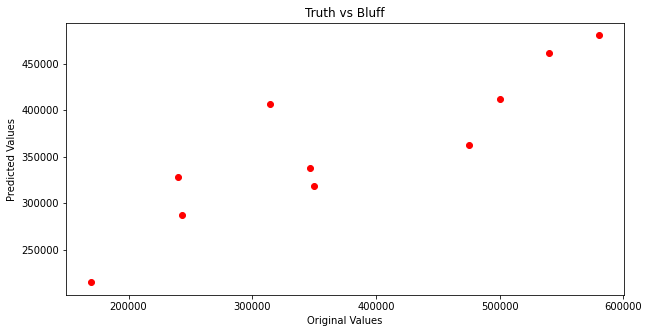

In [153]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,sc.inverse_transform(y_pred),color="red")
plt.xlabel("Original Values")
plt.ylabel("Predicted Values")
plt.title("Truth vs Bluff")
plt.show()

In [154]:
r2_score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 Score = {r2_score}\nMSE = {mse}\nMAE = {mae}")

R2 Score = -7.950844449347809
MSE = 159029653424.74078
MAE = 375849.44539961254


## Without using sklearn

In [155]:
x_ws = np.c_[np.ones(len(x_train)),x_train]
y_ws = y_train.reshape(-1,1)
theta = np.zeros((3,1))
iterations = 1500
alpha = 0.01

In [156]:
x_ws,y_ws,theta

(array([[ 1.  ,  0.7 , -0.27],
        [ 1.  ,  0.11,  1.17],
        [ 1.  ,  0.84, -0.27],
        [ 1.  , -0.92, -0.27],
        [ 1.  ,  0.55, -0.27],
        [ 1.  , -0.12,  1.17],
        [ 1.  , -0.6 , -0.27],
        [ 1.  ,  0.43,  1.17],
        [ 1.  , -1.04, -0.27],
        [ 1.  , -0.77, -1.72],
        [ 1.  , -0.35, -1.72],
        [ 1.  , -0.22, -0.27],
        [ 1.  ,  0.35, -0.27],
        [ 1.  , -0.7 , -0.27],
        [ 1.  ,  3.09,  2.62],
        [ 1.  ,  0.04,  1.17],
        [ 1.  , -0.87, -0.27],
        [ 1.  , -0.17,  1.17],
        [ 1.  , -0.83, -0.27],
        [ 1.  ,  0.22,  1.17],
        [ 1.  , -0.64, -0.27],
        [ 1.  ,  2.77,  1.17],
        [ 1.  , -0.43, -0.27],
        [ 1.  , -0.07, -0.27],
        [ 1.  , -0.63, -0.27],
        [ 1.  ,  2.37, -0.27],
        [ 1.  , -0.51, -0.27],
        [ 1.  ,  0.02,  1.17],
        [ 1.  , -0.87, -0.27],
        [ 1.  , -0.08, -1.72],
        [ 1.  ,  1.32,  1.17],
        [ 1.  , -0.56, -0.27],
        

In [157]:
x_ws.shape,y_ws.shape,theta.shape

((37, 3), (37, 1), (3, 1))

In [158]:
def hypothesis(X,Y,theta):
    return (X.dot(theta) - Y)

In [159]:
def cost_function(X,Y,theta):
    m = len(y_ws)
    J = (hypothesis(X,Y,theta) ** 2) / (2 * m)
    return np.sum(J)

In [160]:
def gradient_descent(X,Y,theta,alpha,iterations):
    m = len(y_ws)
    J_history = []
    J_history.append(cost_function(X,Y,theta))
    for i in range(iterations):
        temp = X.T.dot((hypothesis(X,Y,theta)))
        print(temp)
        theta = theta - (alpha*temp) / m
        J_history.append(cost_function(X,Y,theta))
    return theta,J_history

In [161]:
theta,J_history = gradient_descent(x_ws,y_ws,theta,alpha,iterations)

[[-4.88e-15]
 [-3.18e+01]
 [-1.75e+01]]
[[-5.11e-15]
 [-3.13e+01]
 [-1.71e+01]]
[[-4.88e-15]
 [-3.09e+01]
 [-1.68e+01]]
[[-4.22e-15]
 [-3.05e+01]
 [-1.64e+01]]
[[-4.22e-15]
 [-3.01e+01]
 [-1.61e+01]]
[[-4.22e-15]
 [-2.97e+01]
 [-1.58e+01]]
[[-4.44e-15]
 [-2.94e+01]
 [-1.54e+01]]
[[-4.44e-15]
 [-2.90e+01]
 [-1.51e+01]]
[[-4.44e-15]
 [-2.86e+01]
 [-1.48e+01]]
[[-4.22e-15]
 [-2.82e+01]
 [-1.45e+01]]
[[-4.00e-15]
 [-2.79e+01]
 [-1.42e+01]]
[[-4.44e-15]
 [-2.75e+01]
 [-1.39e+01]]
[[-4.00e-15]
 [-2.72e+01]
 [-1.36e+01]]
[[-4.22e-15]
 [-2.68e+01]
 [-1.33e+01]]
[[-4.00e-15]
 [-2.65e+01]
 [-1.30e+01]]
[[-3.77e-15]
 [-2.61e+01]
 [-1.28e+01]]
[[-3.55e-15]
 [-2.58e+01]
 [-1.25e+01]]
[[-3.44e-15]
 [-2.55e+01]
 [-1.22e+01]]
[[-3.55e-15]
 [-2.52e+01]
 [-1.20e+01]]
[[-2.78e-15]
 [-2.48e+01]
 [-1.17e+01]]
[[-3.33e-15]
 [-2.45e+01]
 [-1.14e+01]]
[[-3.00e-15]
 [-2.42e+01]
 [-1.12e+01]]
[[-2.89e-15]
 [-2.39e+01]
 [-1.09e+01]]
[[-3.55e-15]
 [-2.36e+01]
 [-1.07e+01]]
[[-3.66e-15]
 [-2.33e+01]
 [-1.05e+01]]


In [162]:
theta,J_history

(array([[ 1.67e-16],
        [ 8.63e-01],
        [-8.70e-03]]),
 [0.49999999999999983,
  0.4904728933130679,
  0.48122380401125486,
  0.47224428467358015,
  0.4635261476774877,
  0.4550614571807107,
  0.446842521350849,
  0.43886188483500266,
  0.43111232146204626,
  0.42358682717035084,
  0.41627861315399006,
  0.4091810992206767,
  0.4022879073548866,
  0.39559285547983164,
  0.38908995141213254,
  0.3827733870032413,
  0.376637532461839,
  0.3706769308516177,
  0.36488629275902695,
  0.35926049112573233,
  0.35379455624069617,
  0.34848367088694726,
  0.34332316563826165,
  0.33830851430111847,
  0.3334353294974456,
  0.3286993583838007,
  0.32409647850277573,
  0.31962269376253477,
  0.31527413054052944,
  0.3110470339075526,
  0.30693776396841277,
  0.302942792315625,
  0.2990586985926263,
  0.2952821671631317,
  0.29160998388335035,
  0.28803903297388384,
  0.2845662939882272,
  0.28118883887488566,
  0.2779038291302163,
  0.2747085130391921,
  0.2716002230013674,
  0.2685763729

In [167]:
x_test_ws = np.c_[np.ones(len(x_test)),x_test]
x_test_ws

array([[ 1.  ,  0.31, -0.27],
       [ 1.  ,  1.45, -0.27],
       [ 1.  , -0.14, -1.72],
       [ 1.  ,  1.28,  1.17],
       [ 1.  ,  0.81,  1.17],
       [ 1.  ,  0.06, -0.27],
       [ 1.  ,  0.75,  1.17],
       [ 1.  , -1.16, -3.17],
       [ 1.  , -0.42, -0.27],
       [ 1.  , -0.01,  1.17]])

In [168]:
y_pred_ws = x_test_ws.dot(theta)
y_pred_ws

array([[ 0.27],
       [ 1.26],
       [-0.1 ],
       [ 1.1 ],
       [ 0.69],
       [ 0.06],
       [ 0.64],
       [-0.97],
       [-0.36],
       [-0.02]])

In [171]:
print(sc.inverse_transform(y_pred_ws))

[[362609.27]
 [480457.08]
 [318705.64]
 [461726.56]
 [412549.94]
 [337454.99]
 [407267.54]
 [214683.27]
 [287649.52]
 [328408.87]]


In [172]:
print(np.concatenate((sc.inverse_transform(y_pred_ws).reshape(-1,1),y_test.reshape(-1,1)),axis=1))

[[362609.27 475000.  ]
 [480457.08 579900.  ]
 [318705.64 349900.  ]
 [461726.56 539900.  ]
 [412549.94 499998.  ]
 [337454.99 347000.  ]
 [407267.54 314000.  ]
 [214683.27 169900.  ]
 [287649.52 242900.  ]
 [328408.87 239999.  ]]


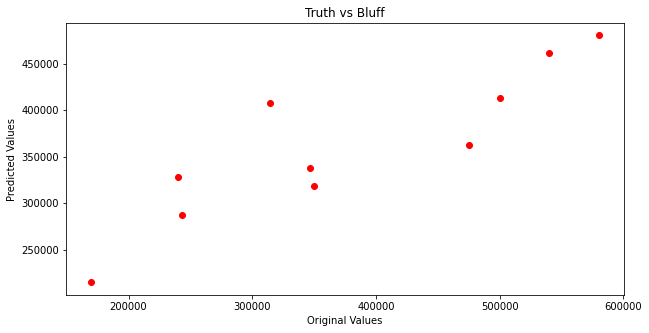

In [173]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,sc.inverse_transform(y_pred_ws),color="red")
plt.xlabel("Original Values")
plt.ylabel("Predicted Values")
plt.title("Truth vs Bluff")
plt.show()